Seeding

In [1]:
#set seeds for reproducibility
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

Importing the dependencies

In [18]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models



Uploading kaggle.json


In [3]:
!pip install kaggle

In [4]:
kaggle_credentials = json.load(open("kaggle.json"))

In [6]:
#setup Kaggle API
os.environ['KAGGLE_USRNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:53<00:00, 42.2MB/s]
100% 2.04G/2.04G [00:53<00:00, 41.1MB/s]


In [8]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [11]:
#unzip the dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [12]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])



['color', 'grayscale', 'segmented']
38
['Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot']
38
['Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot']
38
['Cherry_(including_sour)___Powdery_mildew', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot']


No of classes=38

In [14]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['94ff1dad-4284-4b83-ae37-988cc12c2006___Mt.N.V_HL 8939.JPG', '55afb57b-04f7-437c-92ae-d2b859de5fc1___Mt.N.V_HL 8974.JPG', 'aca0406e-c5ec-421e-a265-3d88d13b3bef___Mt.N.V_HL 6182.JPG', '18fd5d50-f80c-426c-bfdb-5ca325065f24___Mt.N.V_HL 6024.JPG', 'f8bb34c3-13a4-4762-a16d-79ec49823e3e___Mt.N.V_HL 8911.JPG']


Data Preprocessing

In [15]:
#Path dataset
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


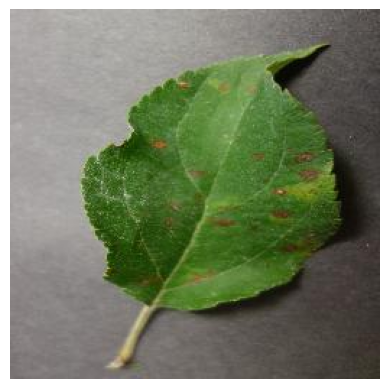

In [16]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667.JPG'

#Reading the image
img = mpimg.imread(image_path)
print(img.shape)

#Displaying the image
plt.imshow(img)
plt.axis('off') #turn off axis no
plt.show()

In [17]:
#Image Parameters
img_size = 224
batch_size = 32

Train Test Split

In [19]:
#Image data generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # use 20% data for validation
)

In [20]:
#Training the generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset= 'training' ,
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [21]:
#Validating the generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size=batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


In [24]:
train_generator.num_classes

38

Convolutional Neural Network(CNN)

In [22]:
#Define the  model
model= models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [23]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 256)               100933888 
                                                                 
 dense_1 (Dense)             (None, 38)                9766      
                                                                 
Total params: 100944550 (385.07 MB)
Trainable params: 100944550 (385.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________

In [25]:
#Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [26]:
#Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, #no of steps per epoch
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size #validatipn steps
)

Epoch 1/5
1358/1358 [==============================] - 115s 82ms/step - loss: 1.4931 - accuracy: 0.6616 - val_loss: 0.6079 - val_accuracy: 0.8178
Epoch 2/5
1358/1358 [==============================] - 108s 80ms/step - loss: 0.3180 - accuracy: 0.9050 - val_loss: 0.5402 - val_accuracy: 0.8398
Epoch 3/5
1358/1358 [==============================] - 105s 78ms/step - loss: 0.1268 - accuracy: 0.9613 - val_loss: 0.6538 - val_accuracy: 0.8294
Epoch 4/5
1358/1358 [==============================] - 104s 77ms/step - loss: 0.0844 - accuracy: 0.9751 - val_loss: 0.7395 - val_accuracy: 0.8261
Epoch 5/5
1358/1358 [==============================] - 109s 80ms/step - loss: 0.0732 - accuracy: 0.9780 - val_loss: 0.9322 - val_accuracy: 0.8060


Model Evaluation

In [27]:
#Evaluating the model
print("Evaluating the model..")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy:{val_accuracy * 100:.2f}%")

Evaluating the model..
339/339 [==============================] - 19s 54ms/step - loss: 0.9322 - accuracy: 0.8060
Validation Accuracy:80.60%


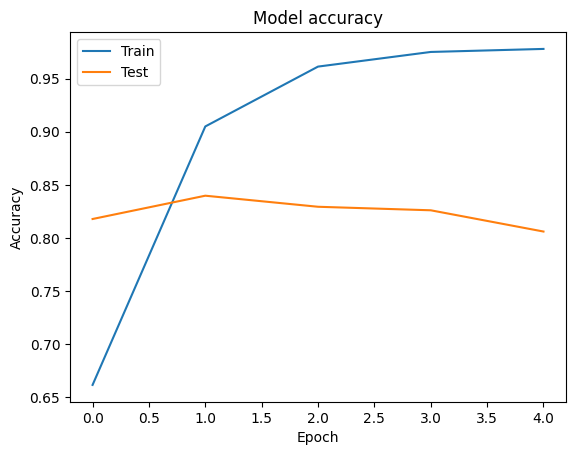

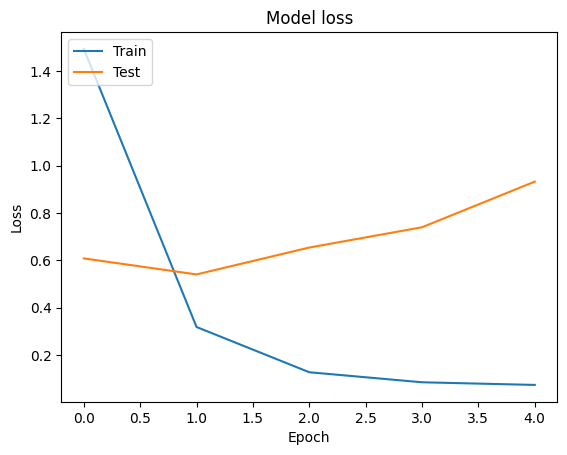

In [31]:
#Plotting training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plotting training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Build A Predictive System

In [38]:
#Function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
  #load the image
  img = Image.open(image_path)

  #Resizing image
  img = img.resize(target_size)

  #Convert the img to numpy array
  img_array = np.array(img)

  #Add batch dimension
  img_array = np.expand_dims(img_array, axis=0)

  #Scaling the img values to [0,1]
  img_array = img_array.astype('float32') / 255.
  return img_array

#Function to predict the class of the image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name



In [33]:
#Create mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [34]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [35]:
#Save the class names as json file
json.dump(class_indices, open('class_indices.json','w'))

In [39]:
#Example Usage
#define the image path
image_path = '/content/test_apple_black_rot.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

#Output the result
print("Predicted class name:", predicted_class_name)

1/1 [==============================] - 0s 184ms/step
Predicted class name: Apple___Black_rot


Saving the model to your device

In [40]:
model.save('drive/MyDrive/Plant/trained_models/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
model.save('plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
